# Wrangle SPEI Data - extracted in R


In [2]:
import sys

sys.path.insert(0, "../../src")
from imports import *

init_notebook()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Load both R files into one df
file_1 = "/Volumes/SAMSUNG 1TB/IFNA/digitalis_v3/processecessed/1km/all/merged/spei/R-spei_split_1.csv"
file_2 = "/Volumes/SAMSUNG 1TB/IFNA/digitalis_v3/processecessed/1km/all/merged/spei/R-spei_split_2.csv"

file_1 = pd.read_csv(file_1)
file_2 = pd.read_csv(file_2)

df_spei = pd.concat([file_1, file_2])

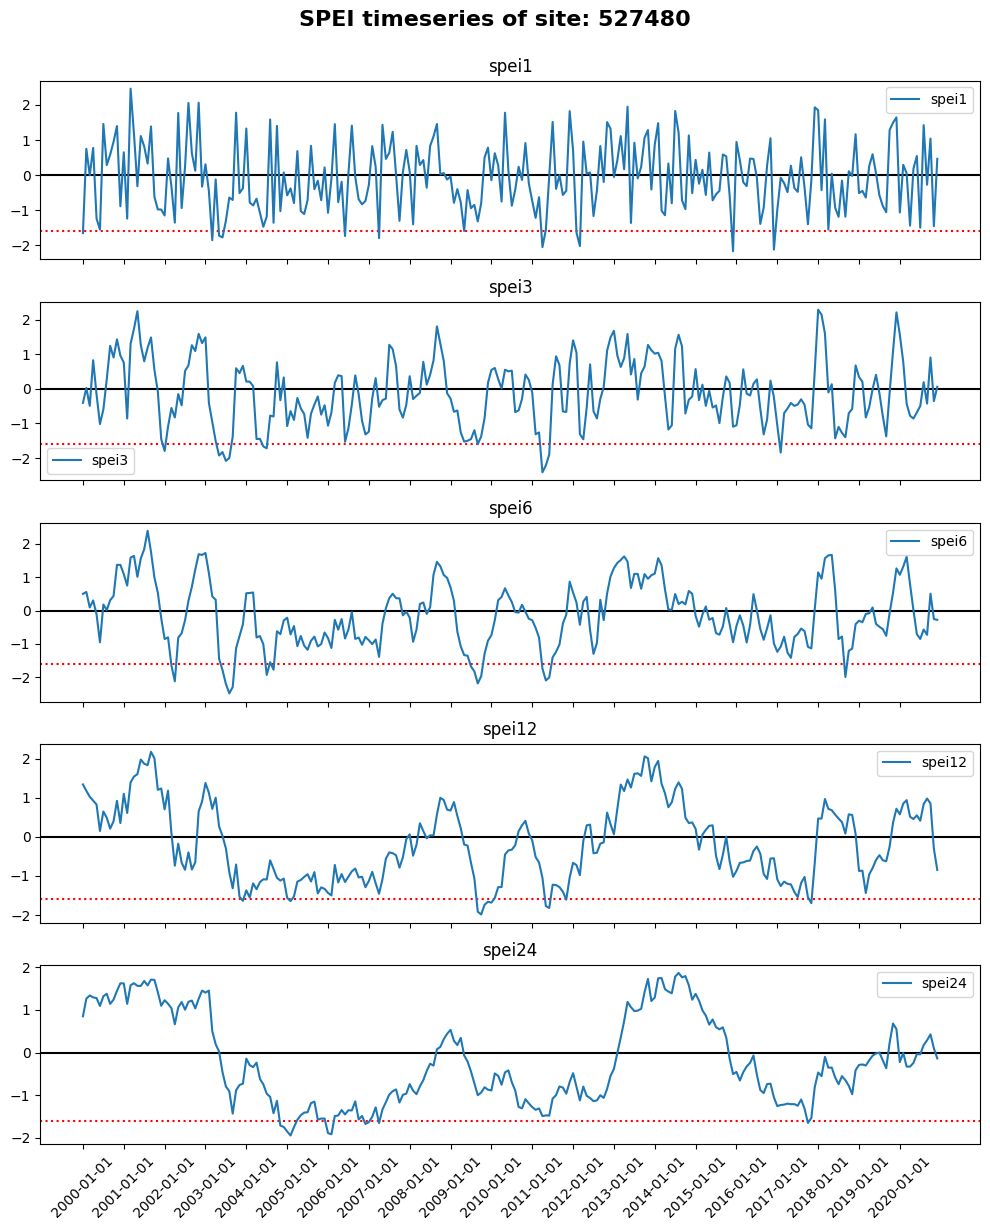

In [10]:
import matplotlib.dates as mdates

# Plot some of the timeseries for SPEI1, SPEI3, SPEI6, SPEI12, SPEI24
site = pd.Series(df_spei.idp.unique()).sample(1, random_state=0).values[0]
df_x = df_spei[df_spei["idp"] == site]
df_x = df_x.query("date >= '2000-01-01'")
# df_x = df_x.query("month == 1")

fig, ax = plt.subplots(5, 1, figsize=(10, 12.5))
for i, col in enumerate(["spei1", "spei3", "spei6", "spei12", "spei24"]):
    ax[i].axhline(0, color="black", linestyle="-")
    ax[i].axhline(-1.6, color="red", linestyle="dotted")
    ax[i].plot(df_x["date"], df_x[col], label=col)
    ax[i].set_title(col)
    ax[i].legend()
    # Show only every 12th date to avoid overlapping
    ax[i].set_xticks(ax[i].get_xticks()[::12])
    # Rotate the x-axis labels
    ax[i].tick_params(axis="x", rotation=45)
    # Show only year on x-axis

for a in ax.flat:
    a.label_outer()

# Show x axis only at bottom
fig.suptitle(f"SPEI timeseries of site: {site}\n", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

In [12]:
# Takes ~10 Minutes
df_spei_trend = calc_spei_trend_loop_mp(df_spei.dropna())
df_spei_trend

 - Splitting df into 10 groups, grouped by idp


100%|██████████| 10/10 [09:42<00:00, 58.23s/it]


,idp,spei1-1_trend,spei2-1_trend,spei3-1_trend,spei4-1_trend,spei5-1_trend,spei6-1_trend,spei7-1_trend,spei8-1_trend,spei9-1_trend,...,spei15-13_trend,spei16-13_trend,spei17-13_trend,spei18-13_trend,spei19-13_trend,spei20-13_trend,spei21-13_trend,spei22-13_trend,spei23-13_trend,spei24-13_trend
0,500002,0.000024,0.000207,0.000162,0.001093,0.001184,0.001086,0.000990,0.000335,0.000012,...,-0.000997,-0.000998,-0.000987,-0.000980,-0.000973,-0.000973,-0.000981,-0.000989,-0.001006,-0.001019
0,500008,-0.000051,0.000290,0.000564,0.001391,0.001303,0.001177,0.001208,0.000865,0.000557,...,-0.000299,-0.000302,-0.000297,-0.000288,-0.000271,-0.000263,-0.000259,-0.000252,-0.000252,-0.000250
0,500012,0.000099,0.000355,0.000292,0.000709,0.000876,0.001126,0.000956,0.000499,0.000266,...,-0.000851,-0.000862,-0.000862,-0.000866,-0.000865,-0.000865,-0.000876,-0.000883,-0.000895,-0.000904
0,500013,-0.000260,0.000248,0.000165,0.000662,0.000653,0.000811,0.000794,0.000472,0.000057,...,-0.000945,-0.000964,-0.000972,-0.000981,-0.000986,-0.000996,-0.001013,-0.001023,-0.001026,-0.001025
0,500027,0.000370,-0.000453,0.000046,0.000122,0.000339,0.000411,0.000520,0.000413,-0.000042,...,-0.000557,-0.000572,-0.000589,-0.000606,-0.000626,-0.000643,-0.000670,-0.000689,-0.000697,-0.000693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1354907,-0.000439,-0.000666,-0.000359,-0.000191,0.000216,0.000231,0.000264,-0.000275,-0.000706,...,-0.001657,-0.001712,-0.001766,-0.001820,-0.001873,-0.001925,-0.001983,-0.002031,-0.002067,-0.002090
0,1354910,-0.000527,-0.000500,-0.000232,0.000036,0.000192,-0.000071,0.000099,-0.000248,-0.000676,...,-0.001269,-0.001320,-0.001359,-0.001395,-0.001423,-0.001453,-0.001486,-0.001510,-0.001530,-0.001540
0,1354911,-0.000048,-0.000011,0.000574,0.001288,0.001255,0.001311,0.001055,0.000717,0.000471,...,-0.000433,-0.000433,-0.000432,-0.000430,-0.000421,-0.000413,-0.000408,-0.000401,-0.000397,-0.000386
0,1354913,-0.000079,-0.000394,0.000286,0.000592,0.000553,0.000157,0.000186,-0.000386,-0.000711,...,-0.001346,-0.001381,-0.001411,-0.001427,-0.001448,-0.001476,-0.001501,-0.001530,-0.001559,-0.001580


In [13]:
# Takes ~10 Minutes
df_spei_minmean = calc_spei_min_mean_loop_mp(
    df_spei.dropna(), years_before_second_visit=7
)
df_spei_minmean

 - Splitting df into 10 groups, grouped by idp


100%|██████████| 10/10 [09:34<00:00, 57.41s/it]  


,idp,spei1-1_min,spei1-1_max,spei1-1_mean,spei2-1_min,spei2-1_max,spei2-1_mean,spei3-1_min,spei3-1_max,spei3-1_mean,...,spei21-13_mean,spei22-13_min,spei22-13_max,spei22-13_mean,spei23-13_min,spei23-13_max,spei23-13_mean,spei24-13_min,spei24-13_max,spei24-13_mean
0,500002,-0.867738,1.087382,-0.070552,-1.233150,1.786886,0.372695,-1.688412,1.447112,0.462750,...,-0.165567,-1.362261,1.341885,-0.162473,-1.178474,1.314358,-0.166531,-1.333188,1.439938,-0.173690
0,500008,-1.117561,0.894391,-0.145384,-1.287011,1.773743,0.334194,-1.609632,1.362940,0.456077,...,0.076874,-1.332542,1.587997,0.090974,-0.895139,1.567667,0.097295,-0.852008,1.692674,0.099661
0,500012,-0.823813,0.838420,0.037238,-1.286402,1.590068,0.269621,-0.792553,1.204576,0.195585,...,-0.156126,-1.238311,0.843162,-0.146805,-1.209178,0.972832,-0.142806,-1.056143,1.041066,-0.144046
0,500013,-0.886497,0.834340,0.051537,-0.323224,1.204487,0.385299,-0.402425,0.962510,0.438468,...,-0.251679,-1.551205,1.191525,-0.258314,-1.604733,1.336710,-0.267102,-1.521226,1.304958,-0.274024
0,500027,-1.226287,1.821744,0.450923,-1.294933,1.537315,0.261614,-0.348295,1.885693,0.750883,...,0.593595,-1.590047,2.507381,0.598945,-1.432230,2.658560,0.593134,-1.422710,2.734328,0.589929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1354907,-0.900868,1.863755,0.019004,-1.824293,1.947649,0.217784,-1.511836,2.087552,0.483345,...,-0.838373,-1.453836,-0.289081,-0.865327,-1.446534,-0.169364,-0.883301,-1.570437,-0.019523,-0.895659
0,1354910,-0.996745,1.720201,-0.123398,-1.771262,1.936884,0.039867,-1.379645,1.945970,0.347327,...,-1.081019,-2.124243,-0.316203,-1.102368,-2.126383,-0.269491,-1.111576,-2.074342,-0.074714,-1.112838
0,1354911,-1.140098,2.254060,0.202886,-1.666507,2.126303,0.324733,-0.997348,2.581706,0.691540,...,-0.775272,-1.950380,0.238311,-0.790529,-1.978171,0.139090,-0.808553,-2.035149,0.247095,-0.814475
0,1354913,-1.227188,2.059187,0.042344,-1.546404,1.980709,-0.132671,-0.862318,2.276579,0.371697,...,-1.175997,-2.340153,0.111111,-1.204218,-2.476219,-0.145489,-1.230238,-2.500892,-0.023215,-1.244955


In [ ]:
# Save dfs as predictors
df_spei_trend.to_feather("../../data/final/predictor_datasets/spei_trend.feather")
df_spei_minmean.to_feather("../../data/final/predictor_datasets/spei_anom.feather")

In [ ]:
# Load dfs
df_spei_trend = pd.read_feather(
    "../../data/final/predictor_datasets/spei_trend.feather"
)
df_spei_minmean = pd.read_feather(
    "../../data/final/predictor_datasets/spei_anom.feather"
)

display(df_spei_trend)
display(df_spei_minmean)

,idp,spei1-1_trend,spei2-1_trend,spei3-1_trend,spei4-1_trend,spei5-1_trend,spei6-1_trend,spei7-1_trend,spei8-1_trend,spei9-1_trend,...,spei15-13_trend,spei16-13_trend,spei17-13_trend,spei18-13_trend,spei19-13_trend,spei20-13_trend,spei21-13_trend,spei22-13_trend,spei23-13_trend,spei24-13_trend
0,500002,0.000024,0.000207,0.000162,0.001093,0.001184,0.001086,0.000990,0.000335,0.000012,...,-0.000997,-0.000998,-0.000987,-0.000980,-0.000973,-0.000973,-0.000981,-0.000989,-0.001006,-0.001019
0,500008,-0.000051,0.000290,0.000564,0.001391,0.001303,0.001177,0.001208,0.000865,0.000557,...,-0.000299,-0.000302,-0.000297,-0.000288,-0.000271,-0.000263,-0.000259,-0.000252,-0.000252,-0.000250
0,500012,0.000099,0.000355,0.000292,0.000709,0.000876,0.001126,0.000956,0.000499,0.000266,...,-0.000851,-0.000862,-0.000862,-0.000866,-0.000865,-0.000865,-0.000876,-0.000883,-0.000895,-0.000904
0,500013,-0.000260,0.000248,0.000165,0.000662,0.000653,0.000811,0.000794,0.000472,0.000057,...,-0.000945,-0.000964,-0.000972,-0.000981,-0.000986,-0.000996,-0.001013,-0.001023,-0.001026,-0.001025
0,500027,0.000370,-0.000453,0.000046,0.000122,0.000339,0.000411,0.000520,0.000413,-0.000042,...,-0.000557,-0.000572,-0.000589,-0.000606,-0.000626,-0.000643,-0.000670,-0.000689,-0.000697,-0.000693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1354907,-0.000439,-0.000666,-0.000359,-0.000191,0.000216,0.000231,0.000264,-0.000275,-0.000706,...,-0.001657,-0.001712,-0.001766,-0.001820,-0.001873,-0.001925,-0.001983,-0.002031,-0.002067,-0.002090
0,1354910,-0.000527,-0.000500,-0.000232,0.000036,0.000192,-0.000071,0.000099,-0.000248,-0.000676,...,-0.001269,-0.001320,-0.001359,-0.001395,-0.001423,-0.001453,-0.001486,-0.001510,-0.001530,-0.001540
0,1354911,-0.000048,-0.000011,0.000574,0.001288,0.001255,0.001311,0.001055,0.000717,0.000471,...,-0.000433,-0.000433,-0.000432,-0.000430,-0.000421,-0.000413,-0.000408,-0.000401,-0.000397,-0.000386
0,1354913,-0.000079,-0.000394,0.000286,0.000592,0.000553,0.000157,0.000186,-0.000386,-0.000711,...,-0.001346,-0.001381,-0.001411,-0.001427,-0.001448,-0.001476,-0.001501,-0.001530,-0.001559,-0.001580


,idp,spei1-1_min,spei1-1_max,spei1-1_mean,spei2-1_min,spei2-1_max,spei2-1_mean,spei3-1_min,spei3-1_max,spei3-1_mean,...,spei21-13_mean,spei22-13_min,spei22-13_max,spei22-13_mean,spei23-13_min,spei23-13_max,spei23-13_mean,spei24-13_min,spei24-13_max,spei24-13_mean
0,500002,-0.867738,1.087382,-0.070552,-1.233150,1.786886,0.372695,-1.688412,1.447112,0.462750,...,-0.165567,-1.362261,1.341885,-0.162473,-1.178474,1.314358,-0.166531,-1.333188,1.439938,-0.173690
0,500008,-1.117561,0.894391,-0.145384,-1.287011,1.773743,0.334194,-1.609632,1.362940,0.456077,...,0.076874,-1.332542,1.587997,0.090974,-0.895139,1.567667,0.097295,-0.852008,1.692674,0.099661
0,500012,-0.823813,0.838420,0.037238,-1.286402,1.590068,0.269621,-0.792553,1.204576,0.195585,...,-0.156126,-1.238311,0.843162,-0.146805,-1.209178,0.972832,-0.142806,-1.056143,1.041066,-0.144046
0,500013,-0.886497,0.834340,0.051537,-0.323224,1.204487,0.385299,-0.402425,0.962510,0.438468,...,-0.251679,-1.551205,1.191525,-0.258314,-1.604733,1.336710,-0.267102,-1.521226,1.304958,-0.274024
0,500027,-1.226287,1.821744,0.450923,-1.294933,1.537315,0.261614,-0.348295,1.885693,0.750883,...,0.593595,-1.590047,2.507381,0.598945,-1.432230,2.658560,0.593134,-1.422710,2.734328,0.589929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1354907,-0.900868,1.863755,0.019004,-1.824293,1.947649,0.217784,-1.511836,2.087552,0.483345,...,-0.838373,-1.453836,-0.289081,-0.865327,-1.446534,-0.169364,-0.883301,-1.570437,-0.019523,-0.895659
0,1354910,-0.996745,1.720201,-0.123398,-1.771262,1.936884,0.039867,-1.379645,1.945970,0.347327,...,-1.081019,-2.124243,-0.316203,-1.102368,-2.126383,-0.269491,-1.111576,-2.074342,-0.074714,-1.112838
0,1354911,-1.140098,2.254060,0.202886,-1.666507,2.126303,0.324733,-0.997348,2.581706,0.691540,...,-0.775272,-1.950380,0.238311,-0.790529,-1.978171,0.139090,-0.808553,-2.035149,0.247095,-0.814475
0,1354913,-1.227188,2.059187,0.042344,-1.546404,1.980709,-0.132671,-0.862318,2.276579,0.371697,...,-1.175997,-2.340153,0.111111,-1.204218,-2.476219,-0.145489,-1.230238,-2.500892,-0.023215,-1.244955


## Heatmap Example


,idp,spei_metric,spei_value,spei_#,spei_month
0,500008,min,-1.117561,1,1
3,500008,min,-1.287011,2,1
6,500008,min,-1.609632,3,1
9,500008,min,-1.085356,4,1
12,500008,min,-0.699496,5,1
...,...,...,...,...,...
921,500008,min,-1.461438,20,13
924,500008,min,-1.497770,21,13
927,500008,min,-1.332542,22,13
930,500008,min,-0.895139,23,13


spei_month,idp,spei_#,1,2,3,4,5,6,7,8,9,10,11,12,13
0,500008,1,-1.117561,-1.165307,-1.769871,-1.526393,-1.680758,-1.161293,-1.909531,-0.808275,-1.356680,-0.927256,-1.583322,-0.716561,-1.909531
1,500008,2,-1.287011,-1.107374,-1.633559,-1.990810,-2.015697,-1.077534,-1.891848,-1.581911,-1.294503,-1.222539,-1.279149,-1.259651,-2.015697
2,500008,3,-1.609632,-0.999439,-1.322843,-1.865056,-1.964703,-1.612576,-1.849798,-1.759837,-0.464639,-1.429454,-1.602867,-0.646155,-1.964703
3,500008,4,-1.085356,-1.388352,-1.112578,-1.760886,-1.990104,-1.856247,-1.574098,-1.688026,-0.441247,-0.797487,-1.077504,-0.296358,-1.990104
4,500008,5,-0.699496,-1.012680,-1.064933,-1.487739,-1.893237,-1.506803,-1.564221,-1.581353,-0.664821,-0.618932,-0.497177,-0.296826,-1.893237
5,500008,6,-0.519142,-0.649673,-0.763669,-1.385463,-1.382300,-1.517770,-1.481469,-1.557423,-1.076904,-0.973216,-0.234716,-0.011498,-1.557423
6,500008,7,-0.372699,-0.211578,-0.852834,-1.106948,-1.555820,-1.517324,-1.146692,-1.501019,-1.405507,-1.270876,-0.743265,-0.282357,-1.555820
7,500008,8,-0.601739,-0.404490,-0.532821,-0.805138,-1.296543,-1.273309,-1.231223,-1.200427,-1.183470,-1.205177,-1.228683,-0.221453,-1.296543
8,500008,9,-0.552139,-0.616576,-0.203286,-0.737826,-1.019309,-1.099195,-1.079208,-1.211718,-1.219667,-1.077400,-1.396305,-0.756906,-1.396305
9,500008,10,-0.781239,-0.558387,-0.398088,-0.556337,-0.641543,-0.864080,-0.940023,-1.150037,-1.291504,-1.103336,-1.512166,-1.143499,-1.512166


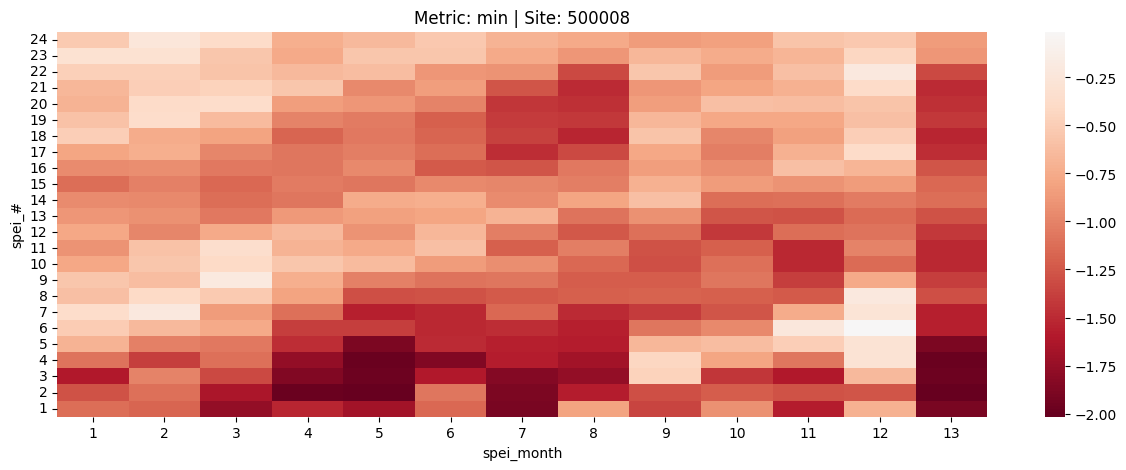

In [16]:
# Pick metric to plot
metric_to_plot = "min"

# Select one site, split values into long format based on spei_-month_metric pattern
df_spei_minmean_long = df_spei_minmean.merge(df_spei_trend, how="left", on="idp").query(
    "idp == 500008"
)

df_spei_minmean_long = df_spei_minmean_long.melt(
    id_vars=["idp"], var_name="spei_metric", value_name="spei_value"
)
df_spei_minmean_long["spei_#"] = (
    df_spei_minmean_long["spei_metric"].str.split("spei").str[1].str.split("_").str[0]
)

df_spei_minmean_long["spei_metric"] = (
    df_spei_minmean_long["spei_metric"].str.split("spei").str[1].str.split("_").str[-1]
)

df_spei_minmean_long["spei_month"] = (
    df_spei_minmean_long["spei_#"].str.split("-").str[1].astype("int")
)

df_spei_minmean_long["spei_#"] = (
    df_spei_minmean_long["spei_#"].str.split("-").str[0].astype("int")
)

# Filter metric
df_spei_minmean_long = df_spei_minmean_long.query(f"spei_metric == '{metric_to_plot}'")

display(df_spei_minmean_long)
# Make matrix of spei_# and spei_month with spei_value as values
df_spei_minmean_long = df_spei_minmean_long.pivot_table(
    index=["idp", "spei_#"], columns="spei_month", values="spei_value"
).reset_index()
display(df_spei_minmean_long)
# Plot matrix
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.heatmap(
    df_spei_minmean_long.drop("idp", axis=1).set_index("spei_#"),
    ax=ax,
    cmap="RdBu",
    center=0,
)
# Set title
ax.set_title(
    f"Metric: {metric_to_plot} | Site: {df_spei_minmean_long['idp'].values[0]}"
)
# Flip coordinates
ax.invert_yaxis()

- spei\_#: Duration over which the SPEI metric was aggregated (1 = preceeding 1 month, 10 = preceeding 10 months, etc.)
- spei_month: Month of the year (13 means that all months were considered when taking the minimum value, not just all Januaries as for spei_month = 1)
- color: Minimum SPEI value for given spei\_#_month pair between the two tree visits.


## Calculation Examples


In [1]:
import sys

sys.path.insert(0, "../../src")
from imports import *

init_notebook()

In [8]:
# Set seed for random site
iseed = 1

# Set SPEI timescale
spei_timescale = 3

# Set season
myseason = "JJA"

# Data source
source = "all/merged"

In [ ]:
# Load precept
df_precetp = pd.read_csv(
    f"/Volumes/SAMSUNG 1TB/IFNA/digitalis_v3/processecessed/1km/{source}/data_to_calculate_spei.csv",
)

# Clean data (was scaled by 10x)
df_precetp["prec"] = df_precetp["prec"] / 10
df_precetp["etp"] = df_precetp["etp"] / 10
display(df_precetp.head())

# Load SPEI from top of this notebook
file_1 = "/Volumes/SAMSUNG 1TB/IFNA/digitalis_v3/processecessed/1km/all/merged/spei/R-spei_split_1.csv"
file_2 = "/Volumes/SAMSUNG 1TB/IFNA/digitalis_v3/processed/1km/all/merged/spei/R-spei_split_2.csv"

file_1 = pd.read_csv(file_1)
file_2 = pd.read_csv(file_2)

df_spei = pd.concat([file_1, file_2])
df = df_spei.copy()
display(df.head())

,idp,first_year,date,year,month,spei1,spei2,spei3,spei4,spei5,...,spei15,spei16,spei17,spei18,spei19,spei20,spei21,spei22,spei23,spei24
0,500002,2010,1961-01-01,1961,1,0.801644,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,500002,2010,1961-02-01,1961,2,0.493079,0.743007,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,500002,2010,1961-03-01,1961,3,-0.457947,-0.077468,0.280944,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,500002,2010,1961-04-01,1961,4,0.639463,0.121877,0.263650,0.492001,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,500002,2010,1961-05-01,1961,5,0.894880,0.992152,0.605622,0.587981,0.745695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Pick example site
unique_sites = df["idp"].unique()
example_site = pd.Series(unique_sites).sample(1, random_state=iseed).values[0]

# ! Filter for example site
ex_precetp = df_precetp.query(f"idp == {example_site}").copy()
ex_spei = df.query(f"idp == {example_site}").copy()

# ! OR Take the mean across all sites
# ex_precetp = df_precetp.groupby(["date"]).mean().reset_index()
# ex_spei = df.groupby(["date", "year", "month"]).mean().reset_index()

# Merge data
ex = pd.merge(ex_precetp, ex_spei, on=["date", "idp"], how="left")
ex["date"] = pd.to_datetime(ex["date"])

# Change month to season string
ex["month"] = ex["month"].map(
    {
        1: "DJF",
        2: "DJF",
        3: "MAM",
        4: "MAM",
        5: "MAM",
        6: "JJA",
        7: "JJA",
        8: "JJA",
        9: "SON",
        10: "SON",
        11: "SON",
        12: "DJF",
    }
)

# Get zoomed in data
ex_zoomed = ex.query("date >= '2000-01-01' & date <= '2007-12-31'")
ex_zoomed_season = ex_zoomed.query(f"month == '{myseason}'")
# ex_zoomed.sort_values("date").head(10)

# Reduce to last month of season
# ex_zoomed_season = ex_zoomed_season.query("month == @myseason")
# ex_zoomed_season = ex_zoomed_season.groupby("year").tail(1)
ex_zoomed_season

,idp,first_year_x,etp,prec,date,first_year_y,year,month,spei1,spei2,...,spei15,spei16,spei17,spei18,spei19,spei20,spei21,spei22,spei23,spei24
473,638906,2011,117.5,150.0,2000-06-01,2011,2000,JJA,1.698630,0.361528,...,0.574970,0.494475,0.478589,0.278755,-0.092273,-0.314845,-0.213702,0.082931,-0.025189,-0.133204
474,638906,2011,115.3,93.4,2000-07-01,2011,2000,JJA,1.389986,1.803201,...,0.742257,0.814991,0.748796,0.738538,0.534535,0.165845,-0.030410,0.065187,0.326891,0.220135
475,638906,2011,107.1,71.5,2000-08-01,2011,2000,JJA,0.754261,1.427993,...,0.831761,0.826999,0.883846,0.821671,0.810412,0.613613,0.254483,0.068968,0.162227,0.404408
485,638906,2011,111.8,72.9,2001-06-01,2011,2001,JJA,0.025459,-0.197620,...,2.058424,2.140841,2.149183,1.900495,1.981634,2.021512,2.000824,1.987453,1.942227,1.917109
486,638906,2011,124.8,78.8,2001-07-01,2011,2001,JJA,0.825749,0.497330,...,2.178564,2.133663,2.224592,2.202955,1.963821,2.050691,2.026243,2.031960,2.031364,1.982680
487,638906,2011,113.6,35.7,2001-08-01,2011,2001,JJA,-1.050562,0.084094,...,2.129656,2.069247,2.031742,2.094947,2.068263,1.822261,1.927430,1.855502,1.879700,1.895210
497,638906,2011,123.8,64.8,2002-06-01,2011,2002,JJA,-0.651264,0.521344,...,-0.995301,-0.173065,-0.349448,0.044177,-0.023485,0.566185,1.164640,1.023813,1.087227,1.259824
498,638906,2011,122.0,108.0,2002-07-01,2011,2002,JJA,1.543464,0.708259,...,-0.556783,-0.614077,0.168479,0.005763,0.360278,0.278120,0.851765,1.383116,1.241111,1.287270
499,638906,2011,97.3,89.8,2002-08-01,2011,2002,JJA,1.758189,1.891717,...,-0.166960,-0.239250,-0.306520,0.436942,0.280186,0.607334,0.523795,1.069962,1.525149,1.384320
509,638906,2011,141.8,49.5,2003-06-01,2011,2003,JJA,-1.799300,-1.482961,...,0.183476,0.133513,0.186401,-0.080749,-0.427113,-0.683333,-0.738014,-0.635831,-0.741711,-0.610988


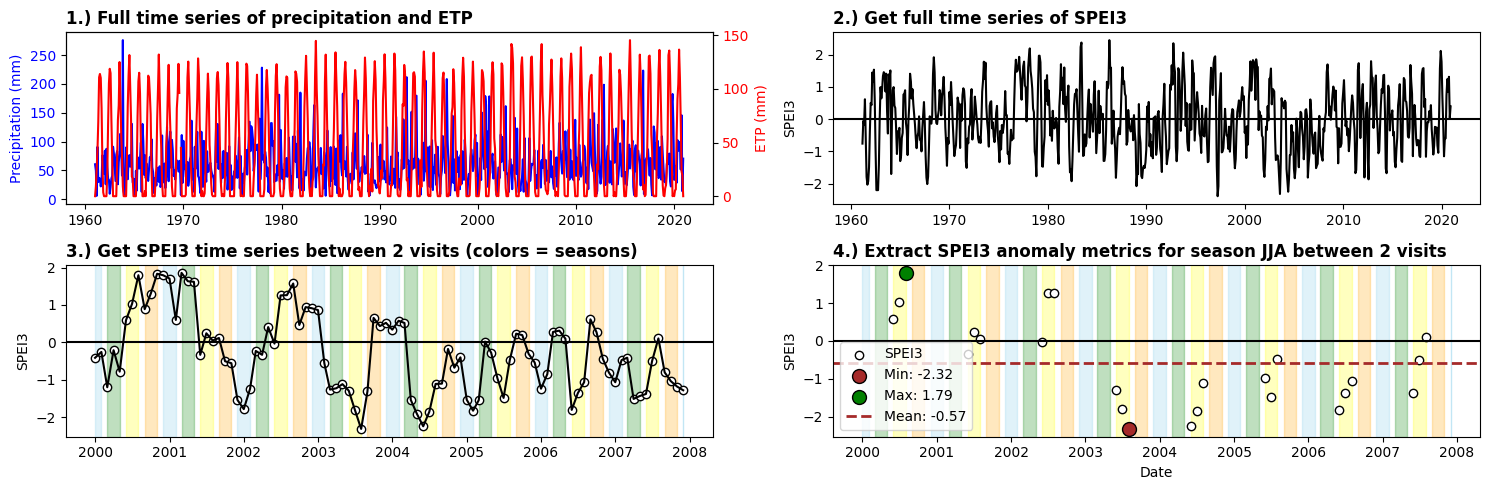

In [ ]:
# Set season colors
season_colors = {
    "DJF": "skyblue",
    "MAM": "green",
    "JJA": "yellow",
    "SON": "orange",
}

# 1. Precipitation and ETP
# fig, ax = plt.subplots(4, 1, figsize=(10, 10))
fig, ax = plt.subplots(2, 2, figsize=(15, 5))
ax = ax.flatten()

# Primary axis for Precipitation
ax[0].plot(ex["date"], ex["prec"], label="Precipitation", color="blue")
ax[0].set_ylabel("Precipitation (mm)", color="blue")
ax[0].tick_params(axis="y", labelcolor="blue")

# Secondary axis for ETP
ax0_twin = ax[0].twinx()  # Create a second y-axis
ax0_twin.plot(ex["date"], ex["etp"], label="ETP", color="red")
ax0_twin.set_ylabel("ETP (mm)", color="red")
ax0_twin.tick_params(axis="y", labelcolor="red")

# Set the title and legend for the first plot
ax[0].set_title(
    "1.) Full time series of precipitation and ETP", fontweight="bold", loc="left"
)
# ax[0].legend(loc="lower left")
# ax0_twin.legend(loc="lower right")

# 2. SPEI
ax[1].axhline(0, color="black", linestyle="-")
ax[1].plot(
    ex["date"],
    ex[f"spei{spei_timescale}"],
    label=f"SPEI{spei_timescale}",
    color="black",
)
ax[1].set_title(
    f"2.) Get full time series of SPEI{spei_timescale}", fontweight="bold", loc="left"
)
ax[1].set_ylabel(f"SPEI{spei_timescale}")
# ax[1].legend(loc="lower left")

# 3. SPEI zoomed in and background colored by season
ax[2].axhline(0, color="black", linestyle="-")

# Iterate through ex_zoomed DataFrame to apply background color by season
current_season = ex_zoomed["month"].iloc[0]
start_date = ex_zoomed["date"].iloc[0]

for i in range(1, len(ex_zoomed)):
    if ex_zoomed["month"].iloc[i] != current_season:
        # End of the current season
        end_date = ex_zoomed["date"].iloc[i - 1]
        ax[2].axvspan(
            start_date, end_date, color=season_colors[current_season], alpha=0.25
        )
        # Start a new season span
        current_season = ex_zoomed["month"].iloc[i]
        start_date = ex_zoomed["date"].iloc[i]

# Add the last season span after loop
ax[2].axvspan(
    start_date,
    ex_zoomed["date"].iloc[-1],
    color=season_colors[current_season],
    alpha=0.5,
)

# Add line and scatter plots
ax[2].plot(
    ex_zoomed["date"],
    ex_zoomed[f"spei{spei_timescale}"],
    label=f"SPEI{spei_timescale}",
    color="black",
)
ax[2].scatter(
    ex_zoomed["date"],
    ex_zoomed[f"spei{spei_timescale}"],
    edgecolor="black",
    color="white",
)
ax[2].set_title(
    f"3.) Get SPEI{spei_timescale} time series between 2 visits (colors = seasons)",
    fontweight="bold",
    loc="left",
)
ax[2].set_ylabel(f"SPEI{spei_timescale}")
# ax[2].legend(loc="lower left")

# 4. SPEI zoomed and all seasons colored
ax[3].axhline(0, color="black", linestyle="-")

# Iterate through ex_zoomed DataFrame to apply background color by season
current_season = ex_zoomed["month"].iloc[0]
start_date = ex_zoomed["date"].iloc[0]

for i in range(1, len(ex_zoomed)):
    if ex_zoomed["month"].iloc[i] != current_season:
        # End of the current season
        end_date = ex_zoomed["date"].iloc[i - 1]
        ax[3].axvspan(
            start_date, end_date, color=season_colors[current_season], alpha=0.25
        )
        # Start a new season span
        current_season = ex_zoomed["month"].iloc[i]
        start_date = ex_zoomed["date"].iloc[i]

# Add the last season span after loop
ax[3].axvspan(
    start_date,
    ex_zoomed["date"].iloc[-1],
    color=season_colors[current_season],
    alpha=0.5,
)

# Add scatter plot
ax[3].scatter(
    ex_zoomed_season["date"],
    ex_zoomed_season[f"spei{spei_timescale}"],
    label=f"SPEI{spei_timescale}",
    color="white",
    edgecolor="black",
)

# Mark min, max and mean values
min_spei = ex_zoomed_season[f"spei{spei_timescale}"].min()
max_spei = ex_zoomed_season[f"spei{spei_timescale}"].max()
mean_spei = ex_zoomed_season[f"spei{spei_timescale}"].mean()

# Add points for min and max
ax[3].scatter(
    ex_zoomed_season.loc[ex_zoomed_season[f"spei{spei_timescale}"] == min_spei, "date"],
    min_spei,
    color="brown",
    edgecolor="black",
    s=100,
    marker="o",
    label=f"Min: {min_spei:.2f}",
)

ax[3].scatter(
    ex_zoomed_season.loc[ex_zoomed_season[f"spei{spei_timescale}"] == max_spei, "date"],
    max_spei,
    color="green",
    edgecolor="black",
    s=100,
    marker="o",
    label=f"Max: {max_spei:.2f}",
)

ax[3].axhline(
    mean_spei,
    color="brown",
    linestyle="--",
    label=f"Mean: {mean_spei:.2f}",
    linewidth=2,
)

ax[3].legend(loc="lower left")
ax[3].set_title(
    f"4.) Extract SPEI{spei_timescale} anomaly metrics for season {myseason} between 2 visits",
    fontweight="bold",
    loc="left",
)
ax[3].set_ylabel(f"SPEI{spei_timescale}")
ax[3].set_xlabel("Date")

plt.tight_layout()
plt.savefig("../../notebooks/02_collect_features/example_spei_features.png")
plt.show()

In [28]:
# Get coordinates of the site
nfi = get_latest_nfi_raw_data()
site_coords = nfi.query(f"idp == {example_site}")[
    ["idp", "lat_fr", "lon_fr"]
].drop_duplicates()
gdf = gpd.GeoDataFrame(
    site_coords,
    geometry=gpd.points_from_xy(site_coords["lon_fr"], site_coords["lat_fr"]),
)
gdf

Loading latest NFI raw data wrangled in R...
👉 Latest file is /Users/pascal/repos/padasch/ifn_analysis/data/tmp/nfi/from-R/20241017-101746_nfi_dataset_raw.csv 
👉 Created on Thursday 2024-10-17, 10:20 which is 3 days ago.


/Users/pascal/repos/padasch/ifn_analysis/notebooks/02_collect_features/../../src/utilities.py:243: DtypeWarning: Columns (22,48,54,55,58,66,67,68,69,82,83,84,85,99,103,104,106,109,110,112,116,122,124,128,130,139,140,144,167,168,169,172,173,174,177,178,179,181,182) have mixed types. Specify dtype option on import or set low_memory=False.
  nfi_data_raw = pd.read_csv(latest_file, index_col=0)


,idp,lat_fr,lon_fr,geometry
537066,638906,6416265.0,1006434.0,POINT (1006434.000 6416265.000)


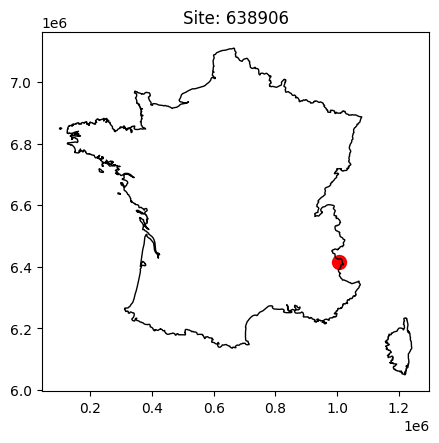

In [29]:
# Get the shapefile of the country
fr = get_shp_of_region("cty")

# Plot the site on the map
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
fr.boundary.plot(ax=ax, color="black", linewidth=1)
gdf.plot(ax=ax, color="red", markersize=100)
plt.title(f"Site: {example_site}")
plt.show()

## SPEI Trends across all sites


In [30]:
import sys

sys.path.insert(0, "../../src")
from imports import *

init_notebook()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
# Set seed for random site
iseed = 1

# Set SPEI timescale
spei_timescale = 3

# Set season
myseason = "JJA"

In [33]:
# Load SPEI and PRECETP data from above

In [34]:
# Pick example site
unique_sites = df["idp"].unique()
example_site = pd.Series(unique_sites).sample(1, random_state=iseed).values[0]

# ! Filter for example site
ex_precetp = df_precetp.query(f"idp == {example_site}").copy()
ex_spei = df.query(f"idp == {example_site}").copy()

# ! OR Take the mean across all sites
# ex_precetp = df_precetp.groupby(["date"]).mean().reset_index()
# ex_spei = df.groupby(["date", "year", "month"]).mean().reset_index()

# Merge data
ex = pd.merge(ex_precetp, ex_spei, on=["date", "idp"], how="left")
ex["date"] = pd.to_datetime(ex["date"])
ex["date_num"] = mdates.date2num(ex["date"])

# Change month to season string
ex["month"] = ex["month"].map(
    {
        1: "DJF",
        2: "DJF",
        3: "MAM",
        4: "MAM",
        5: "MAM",
        6: "JJA",
        7: "JJA",
        8: "JJA",
        9: "SON",
        10: "SON",
        11: "SON",
        12: "DJF",
    }
)

ex

,idp,first_year_x,etp,prec,date,first_year_y,year,month,spei1,spei2,...,spei16,spei17,spei18,spei19,spei20,spei21,spei22,spei23,spei24,date_num
0,638906,2011,0.0,60.5,1961-01-01,2011,1961,DJF,0.828565,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3287.0
1,638906,2011,9.1,49.5,1961-02-01,2011,1961,DJF,0.063218,0.431431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3256.0
2,638906,2011,25.9,5.6,1961-03-01,2011,1961,MAM,-1.438440,-1.204156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3228.0
3,638906,2011,43.1,90.7,1961-04-01,2011,1961,MAM,1.357190,0.010281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3197.0
4,638906,2011,69.3,29.7,1961-05-01,2011,1961,MAM,0.002950,0.939103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,638906,2011,110.3,99.3,2020-08-01,2011,2020,JJA,1.648348,1.365968,...,1.187570,1.149184,1.009481,0.909767,0.719916,0.616898,0.647448,0.829434,0.599943,18475.0
716,638906,2011,69.2,51.3,2020-09-01,2011,2020,SON,-0.168663,0.668065,...,1.096967,1.104927,1.074771,0.928540,0.825534,0.636979,0.536048,0.563070,0.757707,18506.0
717,638906,2011,23.0,145.7,2020-10-01,2011,2020,SON,1.372631,0.919491,...,1.589473,1.393469,1.441627,1.374119,1.263378,1.180021,1.027591,0.941840,0.956514,18536.0
718,638906,2011,19.5,13.7,2020-11-01,2011,2020,SON,-1.442914,0.294303,...,1.212473,1.234296,1.017834,1.044713,1.015556,0.858382,0.756691,0.579913,0.503233,18567.0


In [35]:
from sklearn.linear_model import LinearRegression

# SPEI and Seasons to plot
spei_to_plot = ["spei3", "spei6", "spei12", "spei24"]
seasons_to_plot = ["DJF", "MAM", "JJA", "SON"]

# Calculate the slope of the SPEI values for each season
df_lms = []
df_values = []
for spei in spei_to_plot:
    for season in seasons_to_plot:
        idf = ex.query(f"month == '{season}'").dropna()
        lm = LinearRegression()
        lm.fit(idf[["date_num"]], idf[spei])
        df_lms.append(
            pd.DataFrame(
                {
                    "spei": spei,
                    "season": season,
                    "slope": lm.coef_[0],
                    "intercept": lm.intercept_,
                },
                index=[0],
            )
        )
        # Calculate the values for the regression line
        df_values.append(
            pd.DataFrame(
                {
                    "date_num": idf["date_num"],
                    "spei": spei,
                    "season": season,
                    "value": lm.predict(idf[["date_num"]]),
                }
            )
        )

df_lms = pd.concat(df_lms)
df_values = pd.concat(df_values)
df_values

,date_num,spei,season,value
23,-2588.0,spei3,DJF,-0.094533
24,-2557.0,spei3,DJF,-0.094164
25,-2526.0,spei3,DJF,-0.093795
35,-2223.0,spei3,DJF,-0.090190
36,-2192.0,spei3,DJF,-0.089821
...,...,...,...,...
705,18170.0,spei24,SON,-0.131074
706,18201.0,spei24,SON,-0.131473
716,18506.0,spei24,SON,-0.135405
717,18536.0,spei24,SON,-0.135791


In [36]:
df_values.date_num.min(), df_values.date_num.max()

(-2588.0, 18597.0)

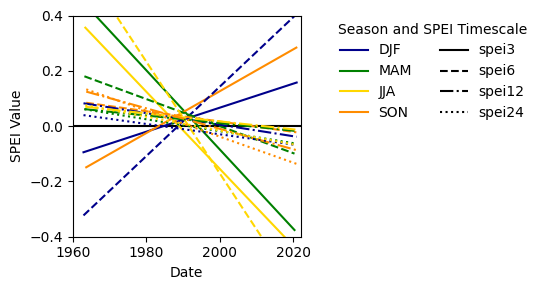

In [37]:
from matplotlib.lines import Line2D
import matplotlib.lines as mlines


# Plot the regression lines, spei is linetype, season is color shade
spei_linetypes = {
    "spei3": "-",
    "spei6": "--",
    "spei12": "-.",
    "spei24": ":",
}

season_colors = {
    "DJF": "darkblue",
    "MAM": "green",
    "JJA": "gold",
    "SON": "darkorange",
}

# Start plot
# fig, ax = plt.subplots(1, 1, figsize=(12, 3))
fig, ax = plt.subplots(1, 1, figsize=(3.3, 3))

# Add zero line
ax.axhline(0, color="black", linestyle="-")

# Add lines
for spei in spei_to_plot:
    for season in seasons_to_plot:
        idf = df_values.query(f"spei == '{spei}' & season == '{season}'")
        ax.plot(
            idf["date_num"],
            idf["value"],
            linestyle=spei_linetypes[spei],
            color=season_colors[season],
        )

# Set the title and legend
# ax.set_title("Trends for different SPEI timescales and seasons", fontweight="bold")
ax.set_ylabel("SPEI Value")
ax.set_xlabel("Date")

# Use equal ylim
ax.set_ylim(-0.4, 0.4)

# Set x-axis to date format
ax.set_xlim(-3500.0, 19000)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_major_locator(mdates.YearLocator())

# Show every 10th date to avoid overlapping
ax.set_xticks(ax.get_xticks()[::20])

# Create legend handles for spei linetypes
spei_handles = [
    mlines.Line2D([], [], color="black", linestyle=linetype, label=spei)
    for spei, linetype in spei_linetypes.items()
]

# Create legend handles for season colors
season_handles = [
    mlines.Line2D([], [], color=color, linestyle="-", label=season)
    for season, color in season_colors.items()
]

# Combine both sets of handles
fig.legend(
    handles=season_handles + spei_handles,  # Combine both sets of handles
    loc="upper right",  # Position at the center top
    bbox_to_anchor=(1.65, 0.95),  # Move the legend below the plot
    ncol=2,  # Arrange all items in one row
    title="Season and SPEI Timescale",
    frameon=False,
)

# Show the plot (optional, as this is just for the legend)
plt.tight_layout()
plt.show()